#Word2vec Workshop

In [ ]:
#코드 참조: https://wikidocs.net/50739
# https://frhyme.github.io/python-libs/gensim0_word2vec_0tutorial/
# https://joyhong.tistory.com/133

## 0. 사전 설치 

### 시각화 폰트 다운 

In [12]:
#나눔고딕폰트 다운
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 글꼴의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=8).get_name()
print(font_name)
plt.rc('font', family=font_name)

%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

NanumGothic


In [ ]:
fm._rebuild()

### 패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install spacy
!pip install natto-py > /dev/null 2>&1

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 

#https://github.com/SOMJANG/Mecab-ko-for-Google-Colab

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
%cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 49.9 MB/s 
     |████████████████████████████████| 448 kB 62.6 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-26 02:16:01--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::34cc:ea4a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=FZYC2gqwdHO95Cu9%2B9fOShqHvYU%3

##1. 텍스트 파일 불러오기 및 전처리

한국어 위키 덤프 파일 이용 
- 참고 1: https://wikidocs.net/50739
- 한국어 위키 데이터베이스: https://ko.wikipedia.org/wiki/위키백과:데이터베이스_다운로드

In [13]:
dir = "/content/gdrive/MyDrive/wikiABC_sent.txt의 사본" #텍스트 파일 저장한 디렉토리 입력

In [14]:
wiki = []
with open (dir, 'r') as f:
  while True:
    line = f.readline()
    if not line: break
    elif line != '\n':
      wiki.append(line)

In [15]:
wiki[:100]

['지미 카터\n',
 '제임스 얼 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39대 대통령 (1977년 ~ 1981년)이다.\n',
 '생애.\n',
 '어린 시절.\n',
 '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.\n',
 '조지아 공과대학교를 졸업하였다.\n',
 '그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다.\n',
 '1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다.\n',
 '그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.\n',
 '정계 입문.\n',
 '1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주지사 선거에 낙선하지만, 1970년 조지아 주지사를 역임했다.\n',
 '대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다.\n',
 '조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.\n',
 '대통령 재임.\n',
 '1976년 미합중국 제39대 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워서, 많은 지지를 받고 제럴드 포드 대통령을 누르고 당선되었다.\n',
 '카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.\n',
 '외교 정책.\n',
 '카터는 이집트와 이스라엘을 조정하여 캠프 데이비드에서 안와르 사다트 대통령과 메나헴 베긴 수상과 함께 중동 평화를 위한 캠프데이비드 협정을 체결했다.\n',
 '이것은 공화당과 미국의 유대인 단체의 반발을 일으켰다.\n',
 '그러나 1979년, 양국 간의 평화조약이 백악관에서 이루어졌다.\n',
 '소련과 제2차 전략 무기 제한 협상(SALT II)에 조인했다.\n',
 '카터는 1970년대 후반 당시 대한민국 등 인권 후진국의 국민들의 인권을 지키기 위해 노력했으며, 취임 이후 계속해서 도덕정치를 내세웠다.

In [16]:
wiki = [string.rstrip() for string in wiki]

"""
wiki = []
for string in wiki:
  wiki.append(string.rstrip())
"""

'\nwiki = []\nfor string in wiki:\n  wiki.append(string.rstrip())\n'

In [17]:
wiki[:100]

['지미 카터',
 '제임스 얼 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39대 대통령 (1977년 ~ 1981년)이다.',
 '생애.',
 '어린 시절.',
 '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.',
 '조지아 공과대학교를 졸업하였다.',
 '그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다.',
 '1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다.',
 '그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.',
 '정계 입문.',
 '1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주지사 선거에 낙선하지만, 1970년 조지아 주지사를 역임했다.',
 '대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다.',
 '조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.',
 '대통령 재임.',
 '1976년 미합중국 제39대 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워서, 많은 지지를 받고 제럴드 포드 대통령을 누르고 당선되었다.',
 '카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.',
 '외교 정책.',
 '카터는 이집트와 이스라엘을 조정하여 캠프 데이비드에서 안와르 사다트 대통령과 메나헴 베긴 수상과 함께 중동 평화를 위한 캠프데이비드 협정을 체결했다.',
 '이것은 공화당과 미국의 유대인 단체의 반발을 일으켰다.',
 '그러나 1979년, 양국 간의 평화조약이 백악관에서 이루어졌다.',
 '소련과 제2차 전략 무기 제한 협상(SALT II)에 조인했다.',
 '카터는 1970년대 후반 당시 대한민국 등 인권 후진국의 국민들의 인권을 지키기 위해 노력했으며, 취임 이후 계속해서 도덕정치를 내세웠다.',
 '임기 말, 소련의 아프가니스탄 침공 사건으로 인해 1980년 하계 

In [18]:
import re  # 정규표현식을 이용한 전처리 (한자어, 문장부호 등 제거)

wiki_edit = [re.sub("[^가-힣0-9a-zA-Z\\s]", " ", string) for string in wiki]

In [19]:
wiki_edit[49]

'수학      줄여서 math 은 수  양  구조  공간  변화 등의 개념을 다루는 학문이다 '

##2. 토크나이징 

토크나이저
- spacy: https://spacy.io
- mecab: https://konlpy-ko.readthedocs.io/ko/v0.5.2/api/konlpy.tag/

### spaCy

In [20]:
import spacy
from spacy.lang.ko import Korean

nlp = Korean()

In [21]:
doc = nlp(u'이것은 문장이다.') #Creates a Doc object 

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_) #prints the text and POS 

이것 이거 PRON NP
은 은 ADP JX
문장 문장 NOUN NNG
이 이 ADP VCP
다 다 X EF
. . PUNCT SF


https://spacy.io/usage/spacy-101

In [22]:
wiki_small = wiki_edit[:1000]

In [23]:
wiki_docs = list(nlp.pipe(wiki_small))

In [25]:
nouns = []
for doc in wiki_docs:
  tokens = []
  for token in doc:
    if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
      tokens.append(token.text)
  nouns.append(tokens)

In [26]:
nouns[49]

['수학', '구조', '공간', '변화', '등', '개념', '학문']

###Mecab

In [24]:
from konlpy.tag import Mecab
mecab = Mecab()

In [27]:
wiki_small = wiki_edit[:500000]

In [28]:
mecab_nouns = []
for sentence in wiki_small:
  mecab_nouns.append(mecab.nouns(sentence))

In [29]:
mecab_nouns[49]

['수학', '구조', '공간', '변화', '등', '개념', '학문']

In [30]:
length = 0
for sent in mecab_nouns: 
  length+= len(sent)

print(length/len(mecab_nouns))

10.05763


##3. Word2vec 학습 

In [31]:
from gensim.models import Word2Vec
model = Word2Vec(mecab_nouns, size=100, window=5, min_count=5, workers=4, sg=1)

In [32]:
model.wv['과거']

array([-0.2968595 ,  0.27523735,  0.38267687,  0.3508886 ,  0.36271146,
        0.45660543,  0.15762128, -0.44676358, -0.0195708 ,  0.47774655,
        0.05244717,  0.5980809 ,  0.27491733, -0.36995193, -0.31384432,
        0.04367752,  0.11254716,  0.04267929,  0.10015808,  0.09108866,
       -0.07659552,  0.033939  ,  0.09338586,  0.01385418,  0.40388355,
       -0.00686147,  0.16596119,  0.15256108,  0.32064748, -0.40521416,
        0.3040933 ,  0.13468568, -0.11470401,  0.27744004,  0.17335796,
       -0.1548115 ,  0.2996313 , -0.02100567,  0.58126634,  0.50055206,
        0.03901699,  0.06729091,  0.50428015,  0.5790483 , -0.14417897,
       -0.54082966,  0.06226615,  0.08477227, -0.12082864, -0.01710564,
       -0.4093167 ,  0.24208988,  0.20315441, -0.03157213,  0.19633885,
       -0.09209414, -0.03315464, -0.17587814, -0.08954962,  0.11041123,
       -0.5248974 , -0.20061988,  0.26985592, -0.05406584, -0.22748049,
       -0.04941908, -0.0432252 ,  0.22578023,  0.46273   ,  0.12

In [33]:
key = list(model.wv.vocab.keys())

In [34]:
key

['카터',
 '제임스',
 '얼',
 '주니어',
 '년',
 '월',
 '일',
 '민주당',
 '출신',
 '미국',
 '대',
 '대통령',
 '생애',
 '시절',
 '조지',
 '섬터',
 '카운티',
 '플',
 '마을',
 '조지아',
 '공과',
 '대학교',
 '졸업',
 '후',
 '해군',
 '전함',
 '원자력',
 '잠수함',
 '승무원',
 '대위',
 '예편',
 '이후',
 '땅콩',
 '면화',
 '등',
 '돈',
 '그',
 '별명',
 '농부',
 '정계',
 '입문',
 '주',
 '상원',
 '의원',
 '선거',
 '낙선',
 '부정',
 '입증',
 '당선',
 '주지사',
 '역임',
 '전',
 '번',
 '연임',
 '지사',
 '근무',
 '흑인',
 '용법',
 '재임',
 '미합중국',
 '후보',
 '출마',
 '도덕주의',
 '정책',
 '지지',
 '제럴드',
 '포드',
 '에너지',
 '개발',
 '촉구',
 '공화',
 '당',
 '반대',
 '무산',
 '외교',
 '이집트',
 '이스라엘',
 '조정',
 '캠프',
 '데이비드',
 '안와르',
 '사다트',
 '수상',
 '중동',
 '평화',
 '협정',
 '체결',
 '이것',
 '유대',
 '단체',
 '반발',
 '양국',
 '간',
 '조약',
 '백악관',
 '소련',
 '차',
 '전략',
 '무기',
 '협상',
 '조인',
 '후반',
 '당시',
 '대한민국',
 '인권',
 '후진국',
 '국민',
 '노력',
 '취임',
 '계속',
 '도덕',
 '정치',
 '임기',
 '말',
 '아프가니스탄',
 '침공',
 '사건',
 '하계',
 '올림픽',
 '반공',
 '국가',
 '보이콧',
 '대사관',
 '인질',
 '구출',
 '실패',
 '원인',
 '로널드',
 '레이건',
 '패',
 '재선',
 '관계',
 '중요',
 '영향',
 '중',
 '하나',
 '문제',
 '주한',
 '미군',
 '철수',
 '

In [35]:
help(model)

Help on Word2Vec in module gensim.models.word2vec object:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)
 |  
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can 

## 4. Word2vec 모델 저장 

###Word2vec 임베딩 저장 

In [41]:
model.wv.save_word2vec_format('/content/gdrive/MyDrive/model1')


In [43]:
import gensim
model1 = gensim.models.KeyedVectors.load_word2vec_format('/content/gdrive/MyDrive/model1')

In [44]:
model1.wv['과거']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([-0.2968595 ,  0.27523735,  0.38267687,  0.3508886 ,  0.36271146,
        0.45660543,  0.15762128, -0.44676358, -0.0195708 ,  0.47774655,
        0.05244717,  0.5980809 ,  0.27491733, -0.36995193, -0.31384432,
        0.04367752,  0.11254716,  0.04267929,  0.10015808,  0.09108866,
       -0.07659552,  0.033939  ,  0.09338586,  0.01385418,  0.40388355,
       -0.00686147,  0.16596119,  0.15256108,  0.32064748, -0.40521416,
        0.3040933 ,  0.13468568, -0.11470401,  0.27744004,  0.17335796,
       -0.1548115 ,  0.2996313 , -0.02100567,  0.58126634,  0.50055206,
        0.03901699,  0.06729091,  0.50428015,  0.5790483 , -0.14417897,
       -0.54082966,  0.06226615,  0.08477227, -0.12082864, -0.01710564,
       -0.4093167 ,  0.24208988,  0.20315441, -0.03157213,  0.19633885,
       -0.09209414, -0.03315464, -0.17587814, -0.08954962,  0.11041123,
       -0.5248974 , -0.20061988,  0.26985592, -0.05406584, -0.22748049,
       -0.04941908, -0.0432252 ,  0.22578023,  0.46273   ,  0.12

### Word2vec 모델 저장 

In [45]:
model.save('/content/gdrive/MyDrive/model2')

In [46]:
model2 = Word2Vec.load('/content/gdrive/MyDrive/model2')

In [47]:
# Resume Training on pre-trained model
more_sentences = [['문장', '하나', '더'], ['문장', '둘']]

# 일단 vocabn을 업데이트해줘야 함.
model2.build_vocab(more_sentences, update=True)
model2.train(more_sentences, total_examples = len(more_sentences), epochs=10)

(50, 50)

## 5. Word2vec 살펴보기 (cosine similarity)

In [48]:
print(model.wv.most_similar("어머니", topn=5))

[('아버지', 0.851690411567688), ('아들', 0.7771587371826172), ('모친', 0.7736159563064575), ('아내', 0.7703293561935425), ('부친', 0.7506546378135681)]


In [49]:
result = model.most_similar(positive=['어머니', '부친'], negative=['아버지'])
print("{}: {:.4f}".format(*result[0]))

모친: 0.8023


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [50]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [51]:
print(analogy('영어', '영국', '프랑스어'))

프랑스


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


## 6. Word2vec 시각화 

In [52]:
import pandas as pd 

from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 

from gensim.models import KeyedVectors

### t-SNE

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 글꼴의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=8).get_name()
print(font_name)
plt.rc('font', family=font_name)

%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False

NanumGothic


In [55]:
import gensim

model = gensim.models.Word2Vec.load('/content/gdrive/MyDrive/model2')
vocab = list(model.wv.vocab) 
X = model[vocab] 

# sz개의 단어에 대해서만 시각화 
sz = 500 
X_show = X[:sz,:] 
vocab_show = vocab[:sz]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [56]:
def show_tsne(): 
    tsne = TSNE(n_components=2) 
    X = tsne.fit_transform(X_show) 
    
    df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
    fig = plt.figure() 
    fig.set_size_inches(20, 20)
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(df['x'], df['y']) 
    
    for word, pos in df.iterrows(): 
        ax.annotate(word, pos, fontsize=15) 
    
    plt.xlabel("t-SNE 0") 
    plt.ylabel("t-SNE 1") 
    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50620 missing from current font.
  font.set_

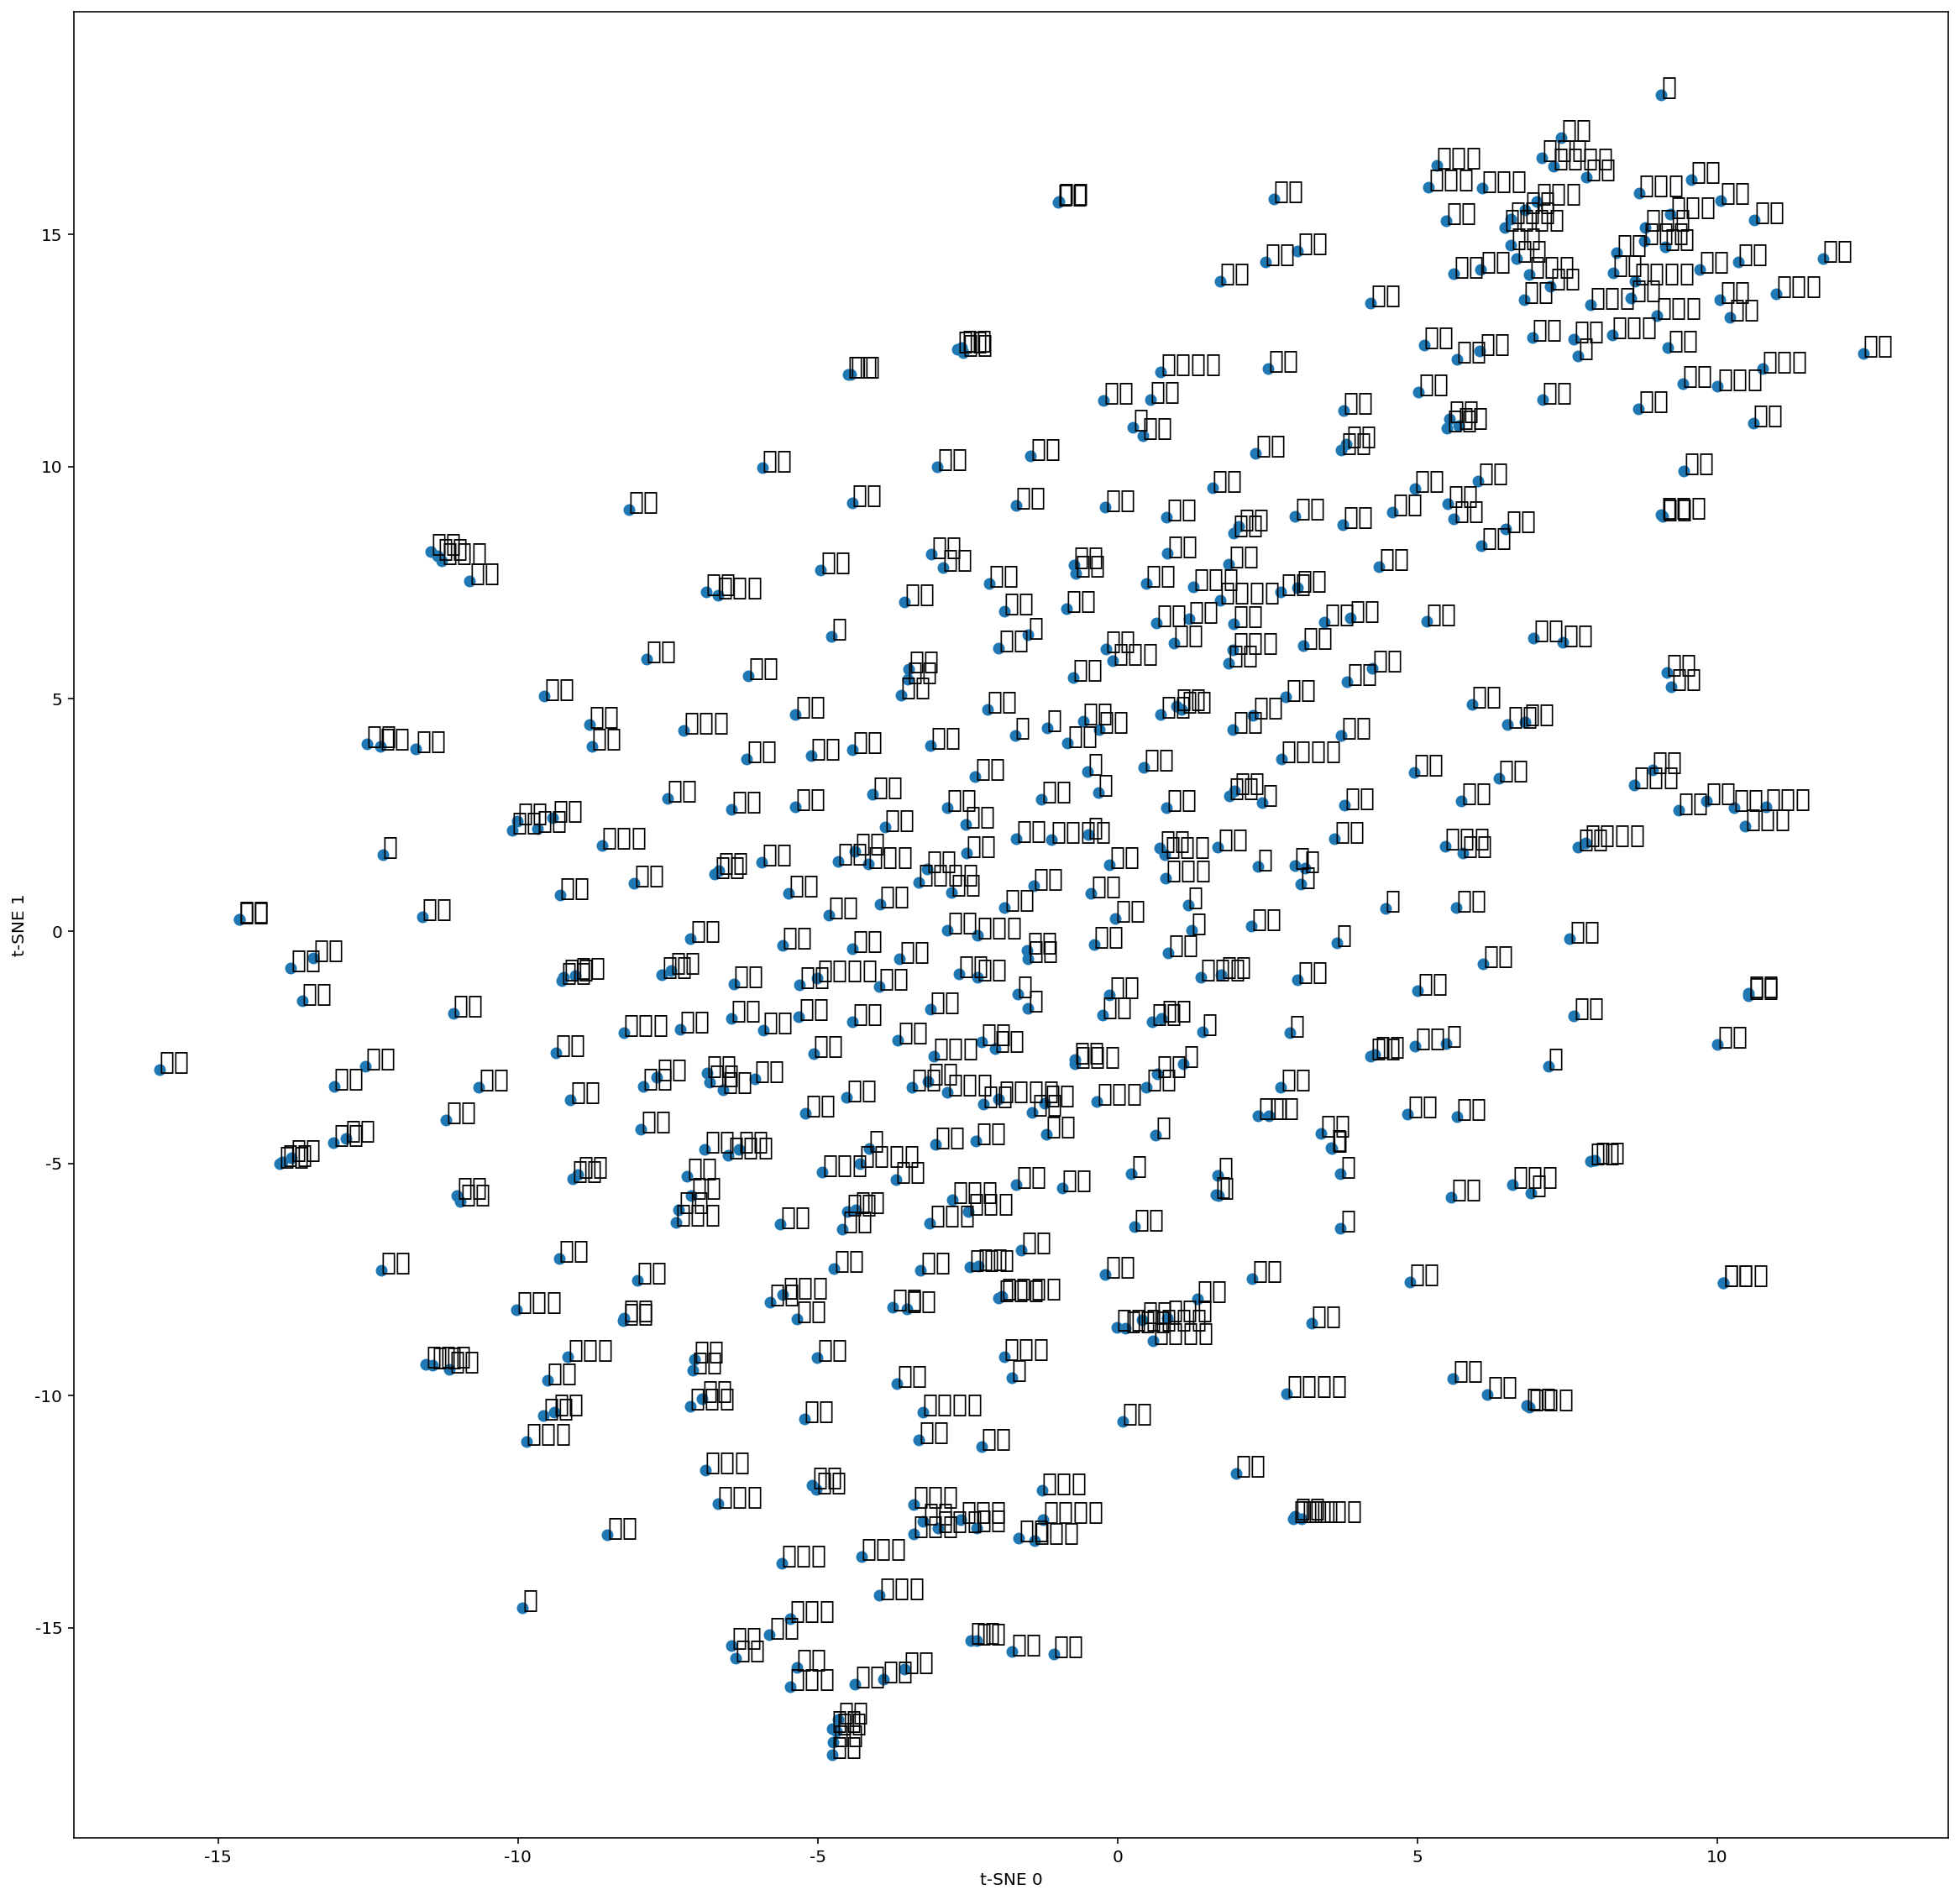

In [59]:
show_tsne()

### PCA 

In [61]:
def show_pca(): 
    
    # PCA 모델을 생성합니다 
    pca = PCA(n_components=2) 
    pca.fit(X_show) 
    
    # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
    x_pca = pca.transform(X_show) 
    
    plt.figure(figsize=(20, 20)) 
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
    
    for i in range(len(X_show)): 
        plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), 
                 fontdict={'weight': 'bold', 'size': 15}) 
    
    plt.xlabel("첫 번째 주성분") 
    plt.ylabel("두 번째 주성분") 
    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

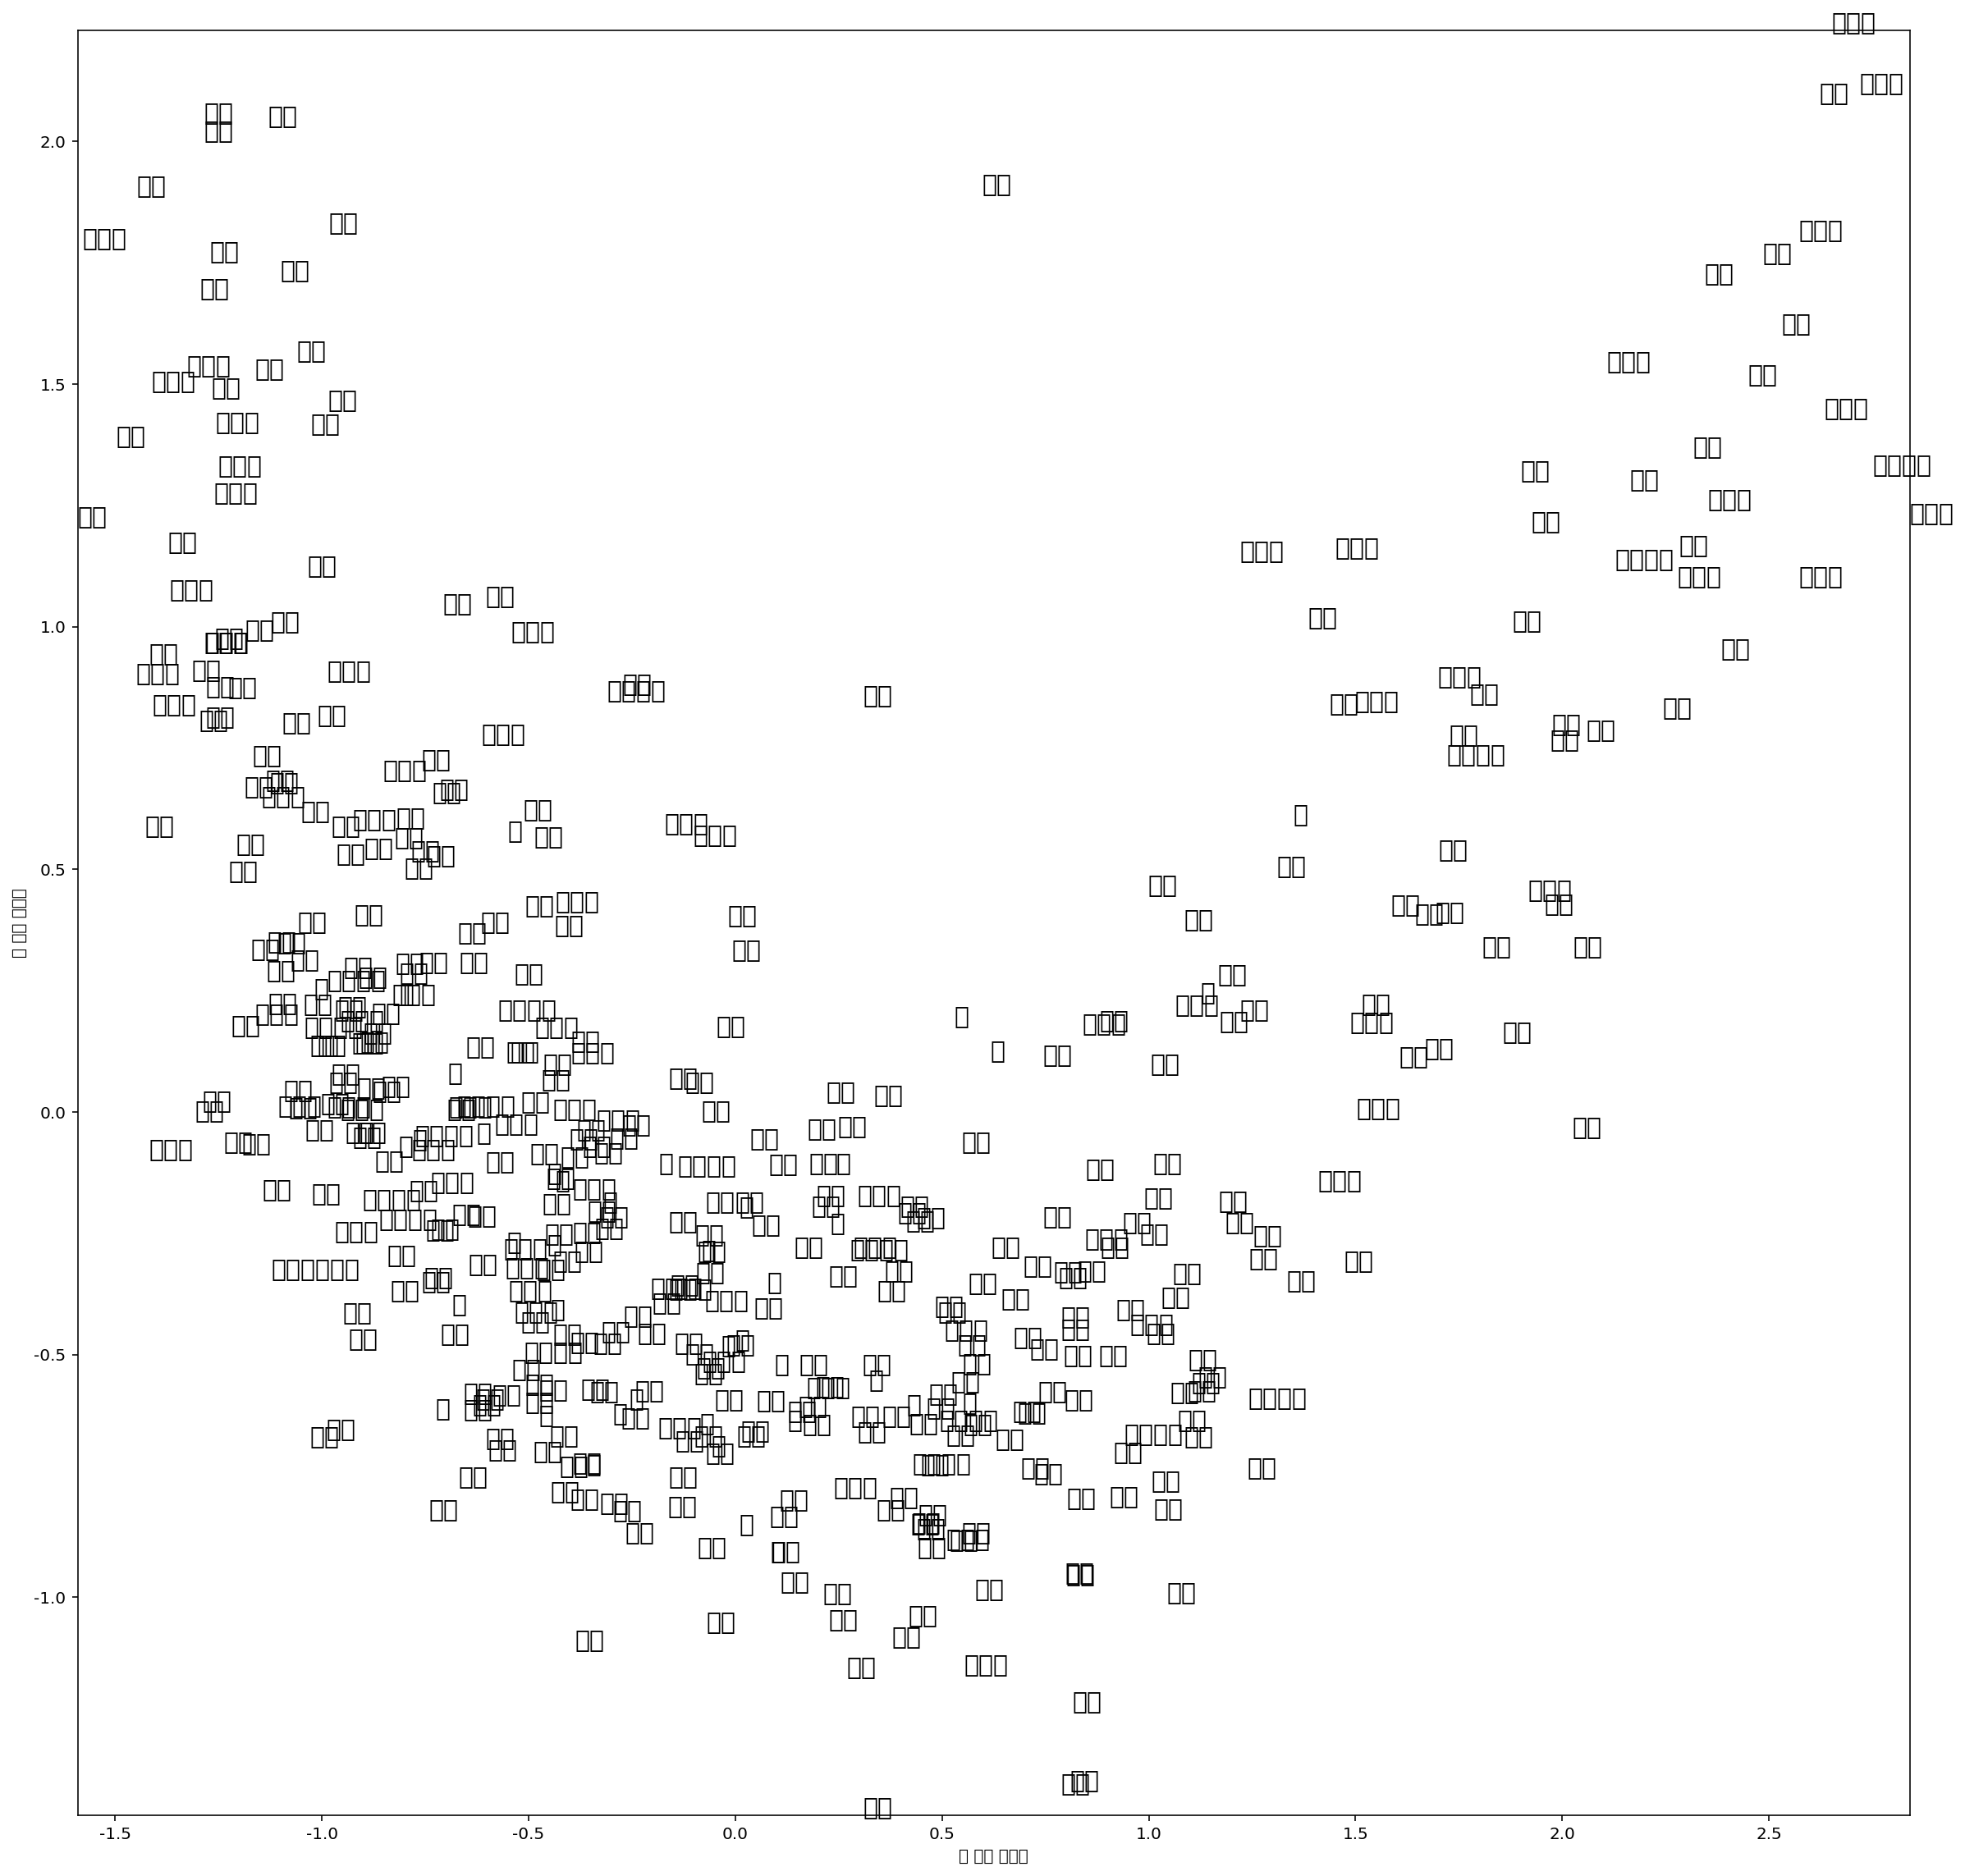

In [62]:
show_pca()